### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from scipy.stats import linregress
import json
import math
from collections import Counter
import numpy as np
from scipy.optimize import curve_fit
import statistics as stat
import matplotlib.colors as mcolors
from scipy.stats import mannwhitneyu
import matplotlib.lines as mlines
from sklearn.linear_model import LinearRegression
from scipy import stats
from matplotlib.gridspec import GridSpec

### PSI-BLAST 5 (E-value cutoff = e-10, %identity cutoff = 30%, query coverage cutoff = 1)

To test that phylogenetic distance positively correlates with expression distance within homologous groups, I ran Mantel tests using the following script:

    within_homologous_group_correlation.R

### Data Loading

In [2]:
data = pd.read_csv('/home/gabe/Desktop/mtstp/data/intermediate_data/gene_cluster_diversity_analysis/phylogenetic_vs_expression_distance.csv')
data

,Unnamed: 0,r,p,group.size,group.pd
0,1,0.324433,0.001000,29,21.679998
1,2,0.097667,0.013000,61,34.506333
2,3,-0.113543,0.782000,17,12.000454
3,4,0.565224,0.333333,4,1.798719
4,5,0.357646,0.001000,15,11.123364
...,...,...,...,...,...
117,118,-0.021434,0.425000,5,3.377283
118,119,0.774573,0.125000,4,1.432116
119,120,-0.543726,0.958333,4,0.967183
120,121,0.163143,0.198611,6,2.769767


In [3]:
#count number of positive associations
correlation_coefficients = list(data['r'])
positive = 0
for coefficient in correlation_coefficients:
    if coefficient > 0:
        positive += 1
print(f"Positive correlation % = {positive / len(correlation_coefficients)}")
print(f"Negative or null correlation % = {(len(correlation_coefficients) - positive) / len(correlation_coefficients)}")

Positive correlation % = 0.7213114754098361
Negative or null correlation % = 0.2786885245901639


<AxesSubplot:xlabel='group.size', ylabel='r'>

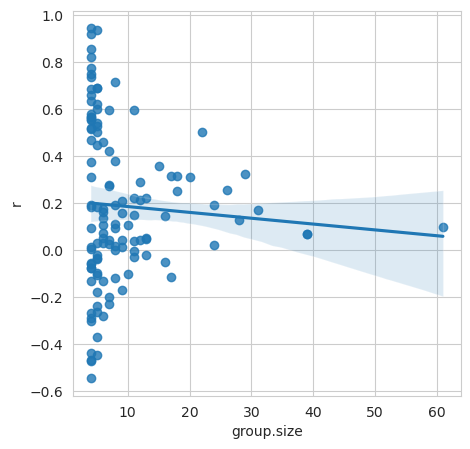

In [4]:
sns.set_style('whitegrid')
sns.set_palette('tab10')

#plot
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

sns.regplot(data=data, x="group.size", y="r",ax=ax1)

### Make plots

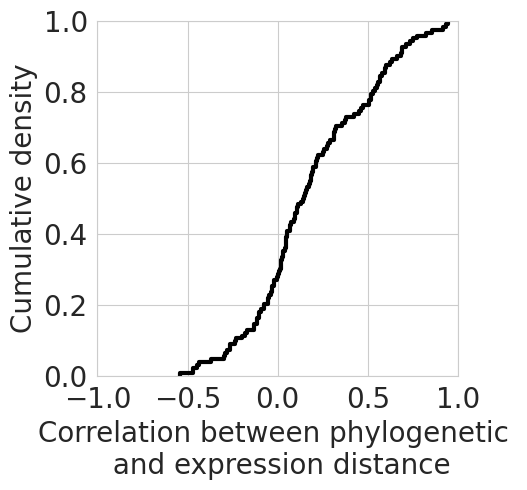

In [6]:
sns.set_style('whitegrid')
sns.set_palette('tab10')

#plot
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

#A
sns.ecdfplot(data=data, x="r", ax=ax1, linewidth=3, color='black')
ax1.set_xlabel('Correlation between phylogenetic \n and expression distance', fontsize = 20)
ax1.set_ylabel('Cumulative density', fontsize = 20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlim(-1,1)
plt.tight_layout()

plt.savefig('/home/gabe/Desktop/mtstp/figures/primary/distance_correlations_ecdf.pdf', bbox_inches='tight', pad_inches=0.1)

In [7]:
#load data for examples
#Group 823: A set of HOX homologs
group_823_data = pd.read_csv('/home/gabe/Desktop/mtstp/data/intermediate_data/gene_cluster_diversity_analysis/group_823_correlation_example.csv')
# Group 615: A set of Osirus protein homologs that have ben implied in octanoic acid (toxic secondary plant chemical) resistance in Drosophila
group_340_data = pd.read_csv('/home/gabe/Desktop/mtstp/data/intermediate_data/gene_cluster_diversity_analysis/group_340_correlation_example.csv')

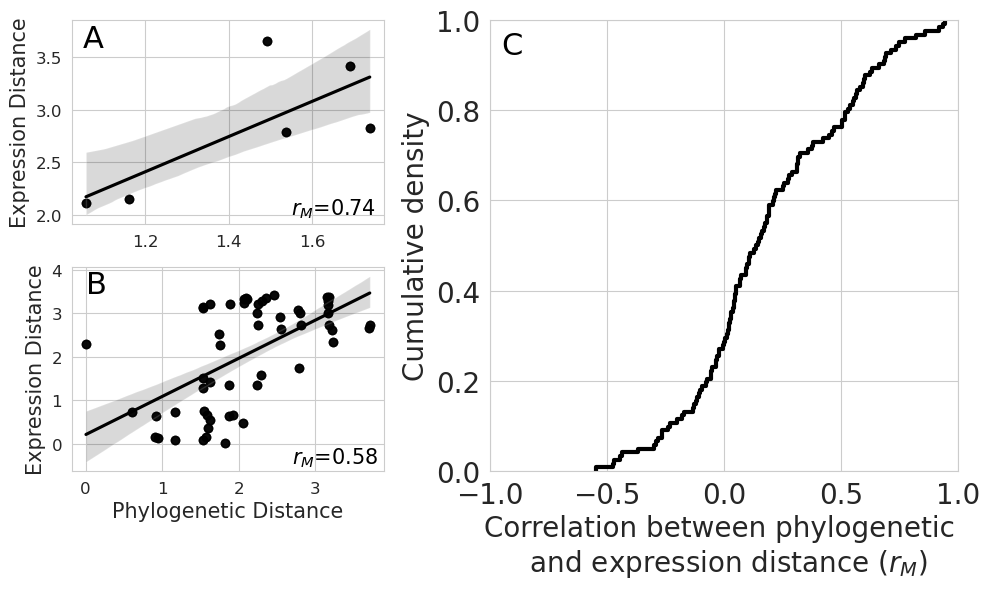

In [22]:
# Create figure and GridSpec layout
fig = plt.figure(figsize=(10, 6))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1], width_ratios=[1,1.5])  # 2 rows, 2 columns, equal heights for rows

# Define subplots within the GridSpec
ax1 = fig.add_subplot(gs[0, 0])  # Top left subplot
ax2 = fig.add_subplot(gs[1, 0])  # Bottom left subplot
ax3 = fig.add_subplot(gs[:, 1])  # Right subplot spanning both rows

#A
sns.ecdfplot(data=data, x="r", ax=ax3, linewidth=3, color='black')
ax3.set_xlabel('Correlation between phylogenetic \n and expression distance ($r_{M}$)', fontsize = 20)
ax3.set_ylabel('Cumulative density', fontsize = 20)
ax3.tick_params(axis='x', labelsize=20)
ax3.tick_params(axis='y', labelsize=20)
ax3.set_xlim(-1,1)

sns.regplot(data=group_823_data, x='phylogenetic.distance', y='expression.distance', ax=ax1, color='black')
sns.regplot(data=group_340_data, x='phylogenetic.distance', y='expression.distance', ax=ax2, color='black')

ax1.set_ylabel('Expression Distance', fontsize=15)
ax1.set_xlabel('')
ax2.set_ylabel('Expression Distance', fontsize=15)
ax2.set_xlabel('Phylogenetic Distance', fontsize=15)

ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)

ax2.tick_params(axis='x', labelsize=12)
ax2.tick_params(axis='y', labelsize=12)

#add correlations
ax1.text(1.55, 2, s='$r_{M}$=0.74', fontsize=15, color='black')
ax2.text(2.7, -0.45, s='$r_{M}$=0.58', fontsize=15, color='black')

#add plot labels
ax1.text(1.05, 3.6, s='A', fontsize=22, color='black')
ax2.text(0, 3.45, s='B', fontsize=22, color='black')
ax3.text(-0.95, 0.925, s='C', fontsize=22, color='black')


plt.tight_layout()
plt.savefig('/home/gabe/Desktop/mtstp/figures/primary/distance_correlations_ecdf_with_examples.pdf', bbox_inches='tight', pad_inches=0.1)

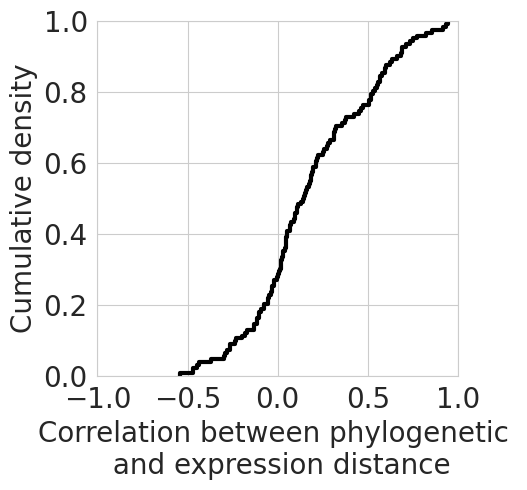

In [6]:
sns.set_style('whitegrid')
sns.set_palette('tab10')

#plot
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

#A
sns.ecdfplot(data=data, x="r", ax=ax1, linewidth=3, color='black')
ax1.set_xlabel('Correlation between phylogenetic \n and expression distance', fontsize = 20)
ax1.set_ylabel('Cumulative density', fontsize = 20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlim(-1,1)
plt.tight_layout()

#plt.savefig('/home/gabe/Desktop/mtstp/figures/primary/distance_correlations_ecdf.pdf', bbox_inches='tight', pad_inches=0.1)

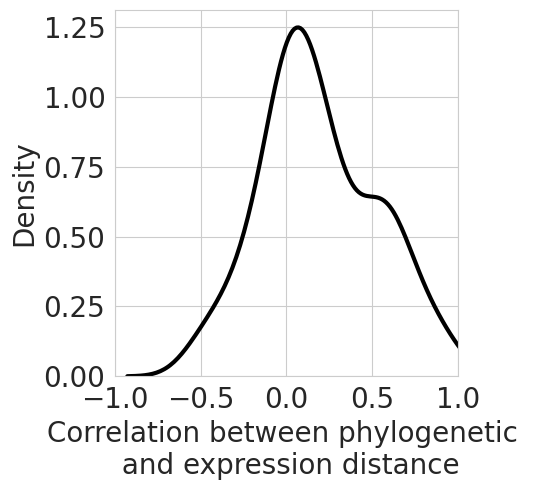

In [12]:
sns.set_style('whitegrid')
sns.set_palette('tab10')

#plot
fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))

#A
sns.kdeplot(data=data, x="r", ax=ax1, linewidth=3, color='black')
ax1.set_xlabel('Correlation between phylogenetic \n and expression distance', fontsize = 20)
ax1.set_ylabel('Density', fontsize = 20)
ax1.tick_params(axis='x', labelsize=20)
ax1.tick_params(axis='y', labelsize=20)
ax1.set_xlim(-1,1)
plt.tight_layout()